In [1]:
# Install library for reading JPK File
%pip uninstall pyafmreader --yes
%pip install git+https://github.com/jlopezalo/pyafmreader.git

Found existing installation: pyafmreader x.x.x
Uninstalling pyafmreader-x.x.x:
  Successfully uninstalled pyafmreader-x.x.x
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmreader.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-jf713uba
  Running command git clone -q https://github.com/jlopezalo/pyafmreader.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-jf713uba
  Cloning https://github.com/TkTech/fasterzip.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-8h9hc_4f/fasterzip_29d5d2a94a884d428b0a335adf64ecbd
  Running command git clone -q https://github.com/TkTech/fasterzip.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-8h9hc_4f/fasterzip_29d5d2a94a884d428b0a335adf64ecbd
  Created wheel for pyafmreader: filename=pyafmreader-x.x.x-py3-none-any.whl size=26225 sha256=1c62204f759fb8dbe3c65dbe6ca4144009f8bfd936a226ea64587de

In [2]:
# Install library for AFM data Rheology Analysis
%pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

Found existing installation: pyafmrheo 0.0.1
Uninstalling pyafmrheo-0.0.1:
  Successfully uninstalled pyafmrheo-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-mh8pm2zl
  Running command git clone -q https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-mh8pm2zl
  Created wheel for pyafmrheo: filename=pyafmrheo-0.0.1-py3-none-any.whl size=32840 sha256=2ffb3f03723d034d601515895460bc702a47d9f168d0a02b1cbd981bbc8dc59b
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-7i_9o4r6/wheels/fb/66/18/3e93b45c845b0d7b83ded1e127a1c127820d070ce5b71dece4
Successfully built pyafmrheo
Note: you may need to restart the kernel to use updated packages.


In [305]:
# Import libraries we will need
import numpy as np
import matplotlib.pyplot as plt

# Get file reader from library
from pyafmreader import loadfile

# Get data analysis tools
from pyafmrheo.utils.force_curves import *
from pyafmrheo.models.hertz import HertzModel
from pyafmrheo.models.ting import TingModel

In [473]:
# Define global variables
file_path = '/Users/javierlopez/Documents/Marseille/05-11-2021/E/map-data-2021.11.05-15.41.45.699.jpk-force-map'
# file_path = '/Users/javierlopez/Documents/testingPyFM/map-data-2021.12.06-19.40.19.296.jpk-force-map'
# file_path = '/Users/javierlopez/Documents/pyafmreader/tests/testfiles/20200903_Egel2.0_00023.spm'
# file_path = '/Users/javierlopez/Documents/pyafmreader/tests/testfiles/20200904_Egel4-Z1.0_00025.spm'
# file_path = '/Users/javierlopez/Documents/pyafmreader/tests/testfiles/08171528.0_00001.pfc'
# Shapes available: paraboloid, pyramid
indenter_shape = "paraboloid"
# indenter_shape = "pyramid"
tip_parameter = 30 * 1e-9 # meters
# tip_parameter = 35 # degrees
# Poisson ratio
poisson_ratio = 0.5
# If None it will use the deflection sensitivity from the file
deflection_sensitivity = None # m/V
# If None it will use the spring constant from the file
spring_constant = None # N/m
# General plotting params
plt.rcParams["figure.figsize"] = (10,5)
vdrag = 0

In [474]:
file = loadfile(file_path)

In [475]:
filemetadata = file.filemetadata
# print(filemetadata)

In [476]:
closed_loop = filemetadata['z_closed_loop']
file_deflection_sensitivity = filemetadata['defl_sens_nmbyV'] #nm/V
file_spring_constant = filemetadata['spring_const_Nbym'] #N/m
height_channel = filemetadata['height_channel_key']

if not deflection_sensitivity: deflection_sensitivity = file_deflection_sensitivity / 1e9 #m/V
if not spring_constant: spring_constant = file_spring_constant
    
print(file_spring_constant)
print(deflection_sensitivity)

0.009727186009888375
3.8481407868505814e-08


In [477]:
# curve_idx = 2276
curve_idx = 0
force_curve = file.getcurve(curve_idx)
extend_segments = force_curve.extend_segments
pause_segments = force_curve.pause_segments
modulation_segments = force_curve.modulation_segments
retract_segments = force_curve.retract_segments
force_curve_segments = force_curve.get_segments()

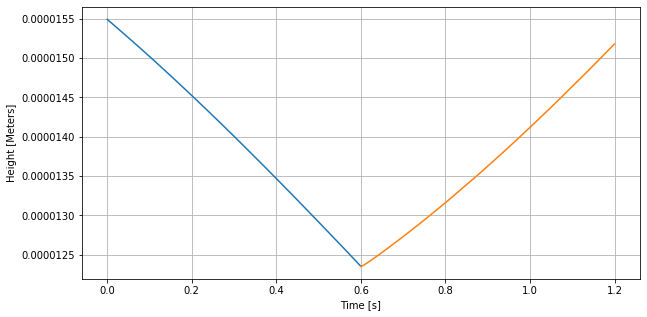

In [478]:
t0 = 0
for seg_id, segment in force_curve_segments:
    height = segment.segment_formated_data[height_channel]
    if seg_id == '1':
         height = height[::-1]
    time = segment.segment_formated_data["time"] + t0
    plt.plot(time, height)
    t0 = time[-1]

plt.xlabel("Time [s]")
plt.ylabel("Height [Meters]")
plt.grid()
plt.show()

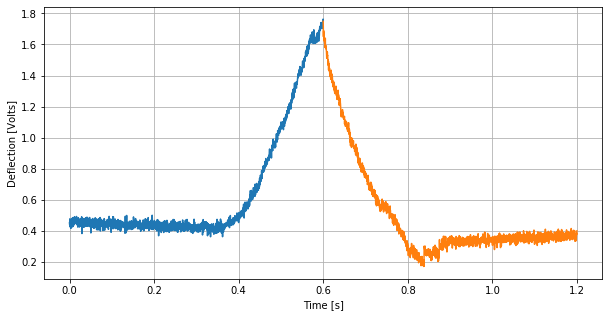

In [479]:
t0 = 0
for seg_id, segment in force_curve_segments:
    deflection = segment.segment_formated_data["vDeflection"]
    time = segment.segment_formated_data["time"] + t0
    plt.plot(time, deflection)
    t0 = time[-1]

plt.xlabel("Time [s]")
plt.ylabel("Deflection [Volts]")
plt.grid()
plt.show()

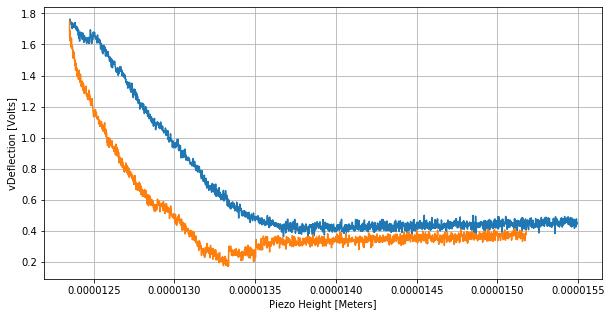

In [480]:
for seg_id, segment in force_curve_segments:
    height = segment.segment_formated_data[height_channel]
    deflection = segment.segment_formated_data["vDeflection"]
    plt.plot(height, deflection)

plt.xlabel("Piezo Height [Meters]")
plt.ylabel("vDeflection [Volts]")
plt.grid()
plt.show()

In [481]:
force_curve.preprocess_force_curve(deflection_sensitivity, height_channel)

# Get approach, first extend segment
first_exted_seg_id, first_ext_seg = extend_segments[0]

# Get retract, last retract segment
last_ret_seg_id, last_ret_seg = retract_segments[-1]

In [482]:
# Shift height
force_curve.shift_height()

In [483]:
v0t = np.abs(first_ext_seg.zheight.min() - first_ext_seg.zheight.max())/first_ext_seg.segment_metadata['duration']
v0r = np.abs(last_ret_seg.zheight.min() - last_ret_seg.zheight.max())/first_ext_seg.segment_metadata['duration']

In [484]:
t_offset = np.abs(first_ext_seg.zheight[-1] - last_ret_seg.zheight[0]) / (v0t*1e6)
dt = np.abs(first_ext_seg.time[1] - first_ext_seg.time[0])
print(t_offset > 2 * dt)
if t_offset > 2 * dt:
     last_ret_seg.time = last_ret_seg.time + t_offset

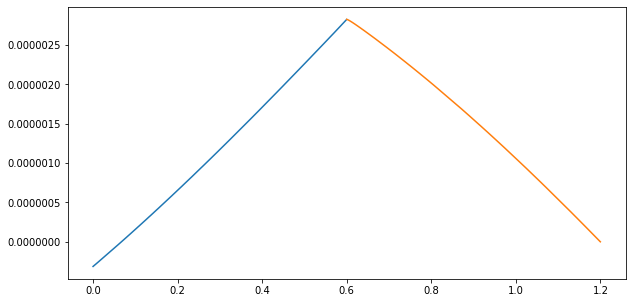

In [485]:
plt.plot(first_ext_seg.time, first_ext_seg.zheight)
plt.plot(last_ret_seg.time + first_ext_seg.time[-1], last_ret_seg.zheight)

In [486]:
app_height = first_ext_seg.zheight
app_deflection = first_ext_seg.vdeflection
ret_height = last_ret_seg.zheight
ret_deflection = last_ret_seg.vdeflection

In [487]:
first_ext_seg.velocity
first_ext_seg.segment_metadata

{'time_stamp': '2021-11-05 15\\:41\\:45.097 +0100',
 'num_points': 3000,
 'duration': 0.6000000000000001,
 'channels': ['height', 'vDeflection', 'measuredHeight'],
 'baseline_measured': True,
 'baseline': 0.4363795114745571,
 'approach_id': '2021.11.03-20.06.22-00013',
 'style': 'extend',
 'setpoint': 1.3357704473718137,
 'z_start': 3000.0,
 'z_end': 0.0,
 'ramp_size': -3000.0,
 'ramp_speed': -4999.999999999999}

In [488]:
np.abs(first_ext_seg.zheight.min() - first_ext_seg.zheight.max())

3.139533845273956e-06

In [489]:
# Find initial PoC, you may get some warnings.
poc = get_poc_RoV_method(app_height, app_deflection, win_size=50)
print(*poc)

1.5863563987854109e-06 1.375145042506078e-09


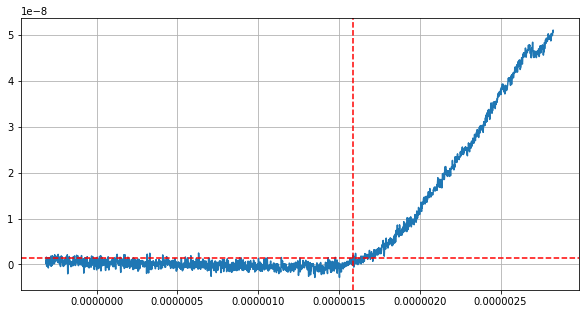

In [490]:
plt.plot(app_height, app_deflection)
plt.axvline(x=poc[0], color='r', linestyle='--')
plt.axhline(y=poc[1], color='r', linestyle='--')
plt.grid()
plt.show()

In [491]:
#plt.plot(app_height, app_deflection)
#mask = app_height<poc[0]
#plt.plot(app_height[mask], app_deflection[mask])
#z = np.poly1d(np.polyfit(app_height[mask], app_deflection[mask], 1))
#plt.plot(app_height[mask], z(app_height[mask]))
#plt.show()
#plt.plot(app_height, app_deflection-z(app_height))
#plt.plot(ret_height, ret_deflection-z(ret_height))
#first_ext_seg.vdeflection = app_deflection-z(app_height)
#last_ret_seg.vdeflection = ret_deflection-z(ret_height)


        # Fit parameters
        Indenter shape: paraboloid

        Tip paraneter: 3.0000000000000004e-08

        BEC Model: None

        Number of free parameters: 3

        delta0: -7.393712965760695e-08

        E0: 1206.6208380852702

        f0: -1.4274400340864506e-11

        slope: None

        # Fit metrics
        MAE: 4.429265286412343e-20

        MSE: 1.2335519932867476e-22

        RMSE: 1.1106538584485932e-11

        Rsq: 0.993995619098217

        Chisq: -8.990169575469353e-09

        RedChisq: -2.9967231918231176e-09

        
1206.6208380852702


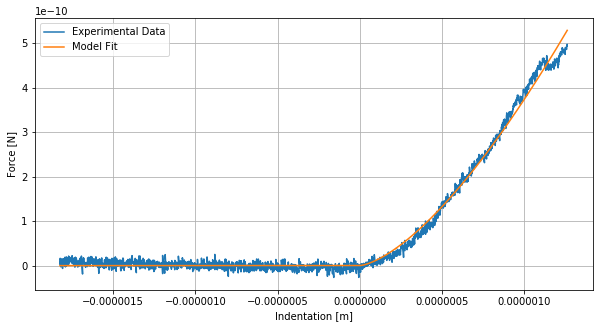

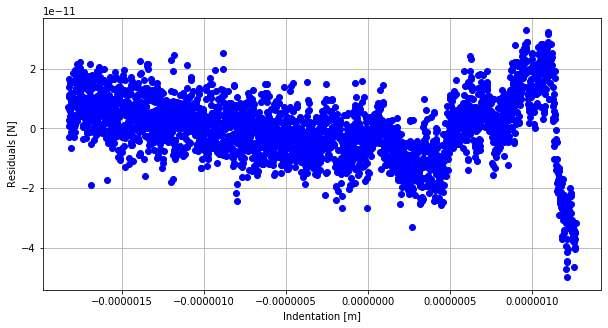

In [492]:
# Hertz fit
first_ext_seg.get_force_vs_indentation(poc, spring_constant)
app_indentation, app_force = first_ext_seg.indentation, first_ext_seg.force

# plt.plot(app_height - poc[0], app_deflection*spring_constant)
# plt.show()

# app_indentation = app_height - poc[0]
# app_force = app_deflection*spring_constant

hertzmodel = HertzModel(indenter_shape, tip_parameter)
hertzmodel.fit(app_indentation, app_force)

hertzmodel.fit_report()

hertz_E0 = hertzmodel.E0
hertz_d0 = hertzmodel.delta0
hertz_f0 = hertzmodel.f0

print(hertz_E0)

# Plot Hertz Fit results
plt.plot(app_indentation-hertz_d0, app_force-hertz_f0, label="Experimental Data")
plt.plot(app_indentation-hertz_d0, hertzmodel.eval(app_indentation)-hertz_f0, label="Model Fit")
plt.xlabel('Indentation [m]')
plt.ylabel('Force [N]')
plt.legend()
plt.grid()
plt.show()

# Plot residuals
plt.plot(app_indentation-hertz_d0, hertzmodel.get_residuals(app_indentation, app_force), "bo")
plt.xlabel('Indentation [m]')
plt.ylabel('Residuals [N]')
plt.grid()
plt.show()

In [493]:
# Get force vs indentation for all segments
poc[0] += hertz_d0

# Get indentation and force
first_ext_seg.get_force_vs_indentation(poc, spring_constant)
app_indentation, app_force, app_time = first_ext_seg.indentation, first_ext_seg.force, first_ext_seg.time
last_ret_seg.get_force_vs_indentation(poc, spring_constant)
ret_indentation, ret_force, ret_time = last_ret_seg.indentation, last_ret_seg.force, last_ret_seg.time

In [494]:
idx_tc = (np.abs(app_indentation - 0)).argmin()
t0 = app_time[-1]
indentation = np.r_[app_indentation, ret_indentation]
time = np.r_[app_time, ret_time + t0]
force = np.r_[app_force, ret_force]
fit_mask = indentation > (-1 * 1e-6)
tc = time[idx_tc]
ind_fit = indentation[fit_mask]
force_fit = force[fit_mask]
force_fit = force_fit - force_fit[0]
time_fit = time[fit_mask]
tc_fit = tc-time_fit[0]
time_fit = time_fit - time_fit[0]
tm = time_fit[np.argmax(force_fit)]
idx_tm = np.argmax(force_fit)

In [495]:
# indentation = np.r_[app_indentation, ret_indentation]
# yf_app_ind = app_indentation[-1]
# y0_ret_ind = ret_indentation[0]
# idx_tc = (np.abs(app_indentation - 0)).argmin()
# yf_app_f = app_force[-1]
# y0_ret_f = ret_force[0]
# t0 = app_time[-1]
# time = np.r_[app_time, ret_time + t0]
# xf_app = app_time[-1]
# x0_ret = (ret_time + t0)[0]
# dt = time[1] - time[0]
# nbrp_int = int(np.round((x0_ret-xf_app)/dt))
# points = np.linspace(xf_app, x0_ret, num=nbrp_int)
# int_points_f = np.interp(points, [xf_app, x0_ret], [yf_app_f, y0_ret_f])
# int_points_ind = np.interp(points, [xf_app, x0_ret], [yf_app_ind, y0_ret_ind])
# int_points_t = points
# idx_start = nbrp_int//2
# plt.plot(app_time, app_indentation, 'o', markersize=2)
# plt.plot(points, int_points_ind, 'o', markersize=2)
# plt.plot(ret_time + t0, ret_indentation, 'o', markersize=2)
# plt.show()
# plt.plot(app_time, app_force, 'o', markersize=2)
# plt.plot(points, int_points_f, 'o', markersize=2)
# plt.plot(ret_time + t0, ret_force, 'o', markersize=2)
# plt.show()
# indentation = np.r_[app_indentation, ret_indentation]
# fit_mask = indentation > (-1 * 1e-6)
# time = np.r_[app_time, ret_time + t0]
# force = np.r_[app_force, ret_force]
# tc = time[idx_tc]
# ind_fit = indentation[fit_mask]
# force_fit = force[fit_mask]
# force_fit = force_fit - force_fit[0]
# time_fit = time[fit_mask]
# tc_fit = tc-time_fit[0]
# time_fit = time_fit - time_fit[0]
# tm = time_fit[np.argmax(force_fit)]
# idx_tm = np.argmax(force_fit)

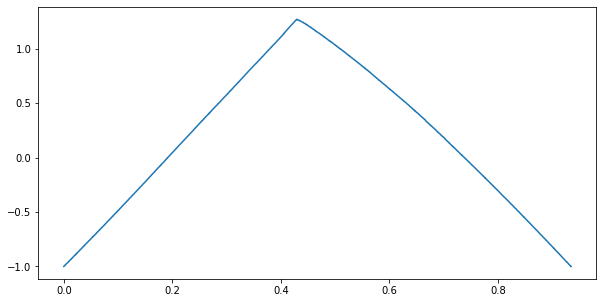

In [496]:
plt.plot(time_fit, ind_fit*1e6)

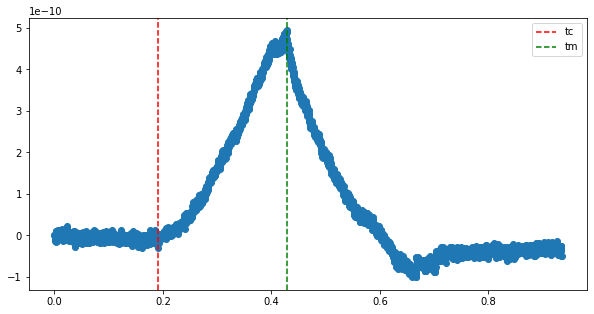

In [497]:
plt.plot(time_fit, force_fit, 'o')
plt.axvline(x=tc_fit, color='r', linestyle='--', label='tc')
plt.axvline(x=tm, color='g', linestyle='--', label='tm')
plt.legend()
plt.show()

In [498]:
downfactor=int(len(time_fit)/1000)
# downfactor=1
idxDown = list(range(0, len(time_fit), downfactor))
idx_tm = np.argmax(force_fit[idxDown])
f0idx = np.where(time_fit==tc_fit)[0]
# vdrag = 1*1e3*1e-9
vdrag = 0
F0_init=force_fit[f0idx]

In [499]:
tc_max = tc_fit+downfactor/(1/(time_fit[1]-time_fit[0]))*10
tc_min = tc_fit-downfactor/(1/(time_fit[1]-time_fit[0]))*10
f0_max = F0_init+100e-12
f0_min = F0_init-100e-12

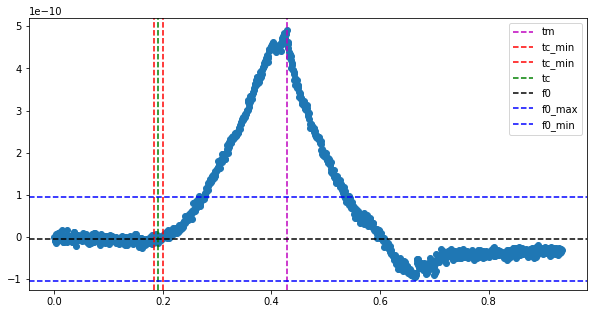

In [500]:
plt.plot(time_fit[idxDown], force_fit[idxDown], 'o')
plt.axvline(x=time_fit[idxDown][idx_tm], color='m', linestyle='--', label='tm')
plt.axvline(x=tc_min, color='r', linestyle='--', label='tc_min')
plt.axvline(x=tc_max, color='r', linestyle='--', label='tc_min')
plt.axvline(x=tc_fit, color='g', linestyle='--', label='tc')
plt.axhline(y=F0_init, color='k', linestyle='--', label='f0')
plt.axhline(y=f0_max, color='b', linestyle='--', label='f0_max')
plt.axhline(y=f0_min, color='b', linestyle='--', label='f0_min')
plt.legend()
plt.show()

In [504]:
from lmfit import Model, Parameters
ting_model_num = TingModel(indenter_shape, tip_parameter, 'numerical')
smooth_w = 1
t0 = 1
modelFt = 'numerical'
v0t = np.abs(first_ext_seg.zheight.min() - first_ext_seg.zheight.max())/first_ext_seg.segment_metadata['duration']
v0r = np.abs(last_ret_seg.zheight.min() - last_ret_seg.zheight.max())/first_ext_seg.segment_metadata['duration']
# modelFt = 'numerical'
idx_tm = np.argmax(force_fit[idxDown])
model_for_fit = lambda time, E0, tc, betaE, F0: ting_model_num.model(time, E0, tc, betaE, F0, t0, force_fit[idxDown], ind_fit[idxDown], modelFt, vdrag, idx_tm, smooth_w, v0t, v0r)
model = Model(model_for_fit)
print(f'parameter names: {model.param_names}')
print(f'independent variables: {model.independent_vars}')
print(hertz_E0)
params = Parameters()
params.add('E0', value=hertz_E0, min=hertz_E0/1000, max=np.inf)
params.add('tc', value=tc_fit, min=tc_min, max=tc_max)
params.add('betaE', value=0.25, min=0.01, max=0.49)
params.add('F0', value=F0_init, min=f0_min, max=f0_max)

result = model.fit(force_fit[idxDown], params, time=time_fit[idxDown])

parameter names: ['E0', 'tc', 'betaE', 'F0']
independent variables: ['time']
1206.6208380852702
[-5.45586872e-12 -5.45586872e-12 -4.21126276e-12 -3.09963799e-12
 -1.94102930e-12 -6.06906029e-13  8.29762425e-13  2.13654771e-12
  3.76807338e-12  5.62009896e-12  7.54598851e-12  9.23427521e-12
  1.11853211e-11  1.28890437e-11  1.47811884e-11  1.72065440e-11
  1.90088362e-11  2.04692129e-11  2.29214219e-11  2.59795768e-11
  2.77593430e-11  2.89827507e-11  3.18076194e-11  3.50106547e-11
  3.74845715e-11  3.94935152e-11  4.12082956e-11  4.38159242e-11
  4.61889685e-11  4.85076622e-11  5.14450680e-11  5.35393014e-11
  5.56961696e-11  5.89520732e-11  6.09495631e-11  6.35638787e-11
  6.69842276e-11  6.89974744e-11  7.20804673e-11  7.47894439e-11
  7.66525331e-11  7.92172943e-11  8.30590920e-11  8.63900592e-11
  8.81749455e-11  9.15495133e-11  9.46290482e-11  9.55797527e-11
  9.91184527e-11  1.02906763e-10  1.05030146e-10  1.07698537e-10
  1.11157777e-10  1.14584387e-10  1.16467918e-10  1.1941759

[-5.45586872e-12 -5.45586872e-12 -4.21126276e-12 -3.09963799e-12
 -1.94102930e-12 -6.06906029e-13  8.29762425e-13  2.13654771e-12
  3.76807338e-12  5.62009896e-12  7.54598851e-12  9.23427521e-12
  1.11853211e-11  1.28890437e-11  1.47811884e-11  1.72065440e-11
  1.90088362e-11  2.04692129e-11  2.29214219e-11  2.59795768e-11
  2.77593430e-11  2.89827507e-11  3.18076194e-11  3.50106547e-11
  3.74845715e-11  3.94935152e-11  4.12082956e-11  4.38159242e-11
  4.61889685e-11  4.85076622e-11  5.14450680e-11  5.35393014e-11
  5.56961696e-11  5.89520732e-11  6.09495631e-11  6.35638787e-11
  6.69842276e-11  6.89974744e-11  7.20804673e-11  7.47894439e-11
  7.66525331e-11  7.92172943e-11  8.30590920e-11  8.63900592e-11
  8.81749455e-11  9.15495133e-11  9.46290482e-11  9.55797527e-11
  9.91184527e-11  1.02906763e-10  1.05030146e-10  1.07698537e-10
  1.11157777e-10  1.14584387e-10  1.16467918e-10  1.19417593e-10
  1.23061629e-10  1.25160250e-10  1.27792429e-10  1.30891118e-10
  1.32393070e-10  1.36406

[-5.45586723e-12 -5.45586723e-12 -4.21126127e-12 -3.09963650e-12
 -1.94102781e-12 -6.06904538e-13  8.29763915e-13  2.13654920e-12
  3.76807487e-12  5.62010045e-12  7.54599000e-12  9.23427670e-12
  1.11853226e-11  1.28890452e-11  1.47811898e-11  1.72065455e-11
  1.90088377e-11  2.04692144e-11  2.29214234e-11  2.59795783e-11
  2.77593444e-11  2.89827522e-11  3.18076209e-11  3.50106562e-11
  3.74845730e-11  3.94935167e-11  4.12082971e-11  4.38159257e-11
  4.61889700e-11  4.85076637e-11  5.14450695e-11  5.35393029e-11
  5.56961711e-11  5.89520747e-11  6.09495646e-11  6.35638802e-11
  6.69842291e-11  6.89974759e-11  7.20804688e-11  7.47894454e-11
  7.66525346e-11  7.92172958e-11  8.30590935e-11  8.63900607e-11
  8.81749470e-11  9.15495148e-11  9.46290496e-11  9.55797542e-11
  9.91184542e-11  1.02906764e-10  1.05030147e-10  1.07698538e-10
  1.11157779e-10  1.14584389e-10  1.16467919e-10  1.19417594e-10
  1.23061631e-10  1.25160251e-10  1.27792431e-10  1.30891120e-10
  1.32393071e-10  1.36406

[-3.15011534e-11 -3.15011534e-11 -3.09005400e-11 -3.03680524e-11
 -2.98159702e-11 -2.91819395e-11 -2.85013554e-11 -2.78863485e-11
 -2.71167739e-11 -2.62437261e-11 -2.53383739e-11 -2.45508954e-11
 -2.36387243e-11 -2.28486404e-11 -2.19693471e-11 -2.08349196e-11
 -2.00048847e-11 -1.93412400e-11 -1.81991363e-11 -1.67680377e-11
 -1.59589548e-11 -1.54188366e-11 -1.41045392e-11 -1.26117943e-11
 -1.14758913e-11 -1.05664717e-11 -9.79937637e-12 -8.60091889e-12
 -7.51822578e-12 -6.46345680e-12 -5.11149286e-12 -4.16969105e-12
 -3.19797727e-12 -1.69640801e-12 -8.06198608e-13  3.81931534e-13
  1.95730478e-12  2.84940123e-12  4.25835721e-12  5.48398598e-12
  6.29990925e-12  7.45574969e-12  9.22668794e-12  1.07458392e-11
  1.15157661e-11  1.30550271e-11  1.44487594e-11  1.48130814e-11
  1.64311787e-11  1.81657611e-11  1.90922840e-11  2.02830593e-11
  2.18548888e-11  2.34077534e-11  2.42131193e-11  2.55353449e-11
  2.71913230e-11  2.80979221e-11  2.92636538e-11  3.06542873e-11
  3.12725165e-11  3.31059

[-3.11276185e-11 -3.11276185e-11 -3.05756222e-11 -3.01029909e-11
 -2.94839120e-11 -2.87924892e-11 -2.81519626e-11 -2.73884266e-11
 -2.67102701e-11 -2.59372850e-11 -2.49422946e-11 -2.41961483e-11
 -2.35821649e-11 -2.25356667e-11 -2.12322259e-11 -2.04848843e-11
 -1.99642789e-11 -1.87230439e-11 -1.73279092e-11 -1.62608803e-11
 -1.53945674e-11 -1.46501352e-11 -1.34906291e-11 -1.24469371e-11
 -1.14241634e-11 -1.01143576e-11 -9.20098943e-12 -8.24655831e-12
 -6.77785447e-12 -5.91062677e-12 -4.73764491e-12 -3.19269277e-12
 -2.31995402e-12 -9.24892807e-13  2.82554742e-13  1.09478186e-12
  2.25372896e-12  4.01373120e-12  5.50913187e-12  6.27089108e-12
  7.81587684e-12  9.20251820e-12  9.57248239e-12  1.12168275e-11
  1.29494178e-11  1.38717637e-11  1.50778820e-11  1.66634113e-11
  1.82200102e-11  1.90300117e-11  2.03788750e-11  2.20535034e-11
  2.29677813e-11  2.41618960e-11  2.55797320e-11  2.62169835e-11
  2.80967989e-11  3.02526258e-11  3.11880904e-11  3.22185235e-11
  3.37305729e-11  3.54821

[-3.10479169e-11 -3.10479169e-11 -3.02115746e-11 -2.95174442e-11
 -2.88245625e-11 -2.79726737e-11 -2.72109205e-11 -2.63266670e-11
 -2.51817317e-11 -2.43310838e-11 -2.36364995e-11 -2.24138215e-11
 -2.08854228e-11 -2.00472594e-11 -1.94813782e-11 -1.80157611e-11
 -1.63743653e-11 -1.51514394e-11 -1.41792707e-11 -1.33550944e-11
 -1.20047029e-11 -1.08102348e-11 -9.64358393e-12 -8.11634307e-12
 -7.10106899e-12 -6.02815777e-12 -4.30233628e-12 -3.35707619e-12
 -2.01302297e-12 -2.02255479e-13  7.36932810e-13  2.35401056e-12
  3.71943238e-12  4.57910331e-12  5.89265527e-12  7.97043881e-12
  9.68642468e-12  1.04569578e-11  1.22508303e-11  1.38251638e-11
  1.40899506e-11  1.60219786e-11  1.80415735e-11  1.90032069e-11
  2.03449597e-11  2.21734369e-11  2.39506605e-11  2.47583768e-11
  2.62794494e-11  2.82124826e-11  2.91495592e-11  3.04634458e-11
  3.20644000e-11  3.26493455e-11  3.48602931e-11  3.73978358e-11
  3.83325113e-11  3.94131520e-11  4.11246405e-11  4.31347686e-11
  4.43681675e-11  4.60769

[-2.91796082e-11 -2.91796082e-11 -2.86806539e-11 -2.82412119e-11
 -2.78009517e-11 -2.72635937e-11 -2.65668332e-11 -2.59958968e-11
 -2.55008297e-11 -2.47061437e-11 -2.37143046e-11 -2.30852777e-11
 -2.26145561e-11 -2.16308888e-11 -2.05179805e-11 -1.96221563e-11
 -1.88686310e-11 -1.82034183e-11 -1.72305767e-11 -1.63341435e-11
 -1.54468112e-11 -1.43392882e-11 -1.35205090e-11 -1.26706224e-11
 -1.14275157e-11 -1.06302438e-11 -9.60077027e-12 -8.28120403e-12
 -7.46476869e-12 -6.25039083e-12 -5.17203409e-12 -4.39592727e-12
 -3.35673559e-12 -1.84517157e-12 -5.23587082e-13  2.32660294e-13
  1.59046246e-12  2.83540325e-12  3.28936195e-12  4.72500714e-12
  6.24527535e-12  7.14226265e-12  8.25391761e-12  9.66688330e-12
  1.10664288e-11  1.18837809e-11  1.31162750e-11  1.46115911e-11
  1.55162886e-11  1.66343463e-11  1.79308301e-11  1.86147680e-11
  2.02722297e-11  2.21666556e-11  2.31099298e-11  2.41159329e-11
  2.55006478e-11  2.70832552e-11  2.82066554e-11  2.96112875e-11
  3.12662616e-11  3.20693

[-2.80579357e-11 -2.80579357e-11 -2.74211062e-11 -2.68549174e-11
 -2.61362402e-11 -2.54586135e-11 -2.46679055e-11 -2.36562190e-11
 -2.28501458e-11 -2.21689969e-11 -2.10667385e-11 -1.96894924e-11
 -1.88413390e-11 -1.82324693e-11 -1.69065940e-11 -1.53992400e-11
 -1.42068834e-11 -1.32261879e-11 -1.23790266e-11 -1.11087020e-11
 -9.94615306e-12 -8.80364213e-12 -7.36078723e-12 -6.32268953e-12
 -5.25143323e-12 -3.63967435e-12 -2.64560138e-12 -1.34219461e-12
  3.60787222e-13  1.36619022e-12  2.90853854e-12  4.26323983e-12
  5.19383597e-12  6.47885244e-12  8.41456050e-12  1.00904886e-11
  1.09788354e-11  1.26812431e-11  1.42322630e-11  1.46898485e-11
  1.64822505e-11  1.84022071e-11  1.94630271e-11  2.08049403e-11
  2.25590447e-11  2.42953042e-11  2.52277743e-11  2.67171509e-11
  2.85694827e-11  2.96126073e-11  3.09361443e-11  3.25042586e-11
  3.32335389e-11  3.52856128e-11  3.76731552e-11  3.87567558e-11
  3.99068072e-11  4.15719314e-11  4.35109579e-11  4.48211308e-11
  4.65052952e-11  4.85317

[-2.84368962e-11 -2.84368962e-11 -2.77232377e-11 -2.71123661e-11
 -2.63384137e-11 -2.56210049e-11 -2.47811918e-11 -2.37011651e-11
 -2.28640699e-11 -2.21659794e-11 -2.09923683e-11 -1.95254481e-11
 -1.86685832e-11 -1.80690588e-11 -1.66541763e-11 -1.50576887e-11
 -1.38302312e-11 -1.28366913e-11 -1.19852246e-11 -1.06520618e-11
 -9.45222360e-12 -8.27617783e-12 -6.76419409e-12 -5.71778066e-12
 -4.62491523e-12 -2.92453219e-12 -1.93567875e-12 -5.85856584e-13
  1.20527600e-12  2.19713483e-12  3.80838694e-12  5.19584563e-12
  6.10932643e-12  7.43545490e-12  9.48403843e-12  1.12150092e-11
  1.20611191e-11  1.38459611e-11  1.54415648e-11  1.58097213e-11
  1.77124744e-11  1.97251358e-11  2.07576552e-11  2.21282380e-11
  2.39589021e-11  2.57540149e-11  2.66421795e-11  2.81805292e-11
  3.01155591e-11  3.11268845e-11  3.24748008e-11  3.40951048e-11
  3.47663005e-11  3.69471471e-11  3.94664025e-11  4.04967956e-11
  4.16361960e-11  4.33631321e-11  4.53832589e-11  4.66832549e-11
  4.84183932e-11  5.05291

[-2.84202412e-11 -2.84202412e-11 -2.77029569e-11 -2.70810080e-11
 -2.64671200e-11 -2.57214169e-11 -2.47551328e-11 -2.39806906e-11
 -2.33230584e-11 -2.22395605e-11 -2.08825897e-11 -2.00610678e-11
 -1.94730486e-11 -1.81484692e-11 -1.66485154e-11 -1.54745471e-11
 -1.45137908e-11 -1.36840938e-11 -1.24137180e-11 -1.12606149e-11
 -1.01271392e-11 -8.68270238e-12 -7.66278155e-12 -6.60183589e-12
 -4.97864006e-12 -4.00714846e-12 -2.70436190e-12 -9.89899337e-13
 -1.02503089e-14  1.53983430e-12  2.88677926e-12  3.79344595e-12
  5.07935525e-12  7.04091481e-12  8.71574290e-12  9.56755255e-12
  1.12867396e-11  1.28360746e-11  1.32412334e-11  1.50669976e-11
  1.70060247e-11  1.80359376e-11  1.93745541e-11  2.11444236e-11
  2.28863452e-11  2.37825103e-11  2.52789872e-11  2.71501775e-11
  2.81625174e-11  2.94832409e-11  3.10597267e-11  3.17503969e-11
  3.38469822e-11  3.62727586e-11  3.73125715e-11  3.84438496e-11
  4.01230007e-11  4.20817309e-11  4.33702629e-11  4.50622538e-11
  4.71094287e-11  4.79216

[-2.83826244e-11 -2.83826244e-11 -2.76664483e-11 -2.70541475e-11
 -2.62783947e-11 -2.55596836e-11 -2.47182413e-11 -2.36359464e-11
 -2.27978024e-11 -2.20990928e-11 -2.09230611e-11 -1.94531384e-11
 -1.85959226e-11 -1.79965846e-11 -1.65786466e-11 -1.49791445e-11
 -1.37504360e-11 -1.27563326e-11 -1.19045589e-11 -1.05691625e-11
 -9.36795550e-12 -8.19064826e-12 -6.67622793e-12 -5.62938167e-12
 -4.53561135e-12 -2.83212833e-12 -1.84327996e-12 -4.91719424e-13
  1.30250048e-12  2.29409750e-12  3.90784681e-12  5.29658494e-12
  6.20973134e-12  7.53746245e-12  9.58997132e-12  1.13229379e-11
  1.21678946e-11  1.39557276e-11  1.55530240e-11  1.59185005e-11
  1.78251890e-11  1.98411063e-11  2.08729228e-11  2.22447398e-11
  2.40781853e-11  2.58754745e-11  2.67624496e-11  2.83027236e-11
  3.02407379e-11  3.12512768e-11  3.26003079e-11  3.42226128e-11
  3.48921785e-11  3.70775706e-11  3.96013756e-11  4.06302616e-11
  4.17696571e-11  4.34989494e-11  4.55220224e-11  4.68219639e-11
  4.85591029e-11  5.06729

[-2.83404564e-11 -2.83404564e-11 -2.76213760e-11 -2.70074898e-11
 -2.62297373e-11 -2.55096243e-11 -2.46664090e-11 -2.35816196e-11
 -2.27424168e-11 -2.20431351e-11 -2.08644403e-11 -1.93912220e-11
 -1.85338097e-11 -1.79348582e-11 -1.65135340e-11 -1.49107532e-11
 -1.36808370e-11 -1.26863025e-11 -1.18343702e-11 -1.04965725e-11
 -9.29399655e-12 -8.11544391e-12 -6.59842184e-12 -5.55131575e-12
 -4.45671109e-12 -2.74985671e-12 -1.76127064e-12 -4.07916307e-13
  1.38963503e-12  2.38065504e-12  3.99706426e-12  5.38701918e-12
  6.29952821e-12  7.62889981e-12  9.68570751e-12  1.14206773e-11
  1.22640066e-11  1.40550690e-11  1.56540394e-11  1.60161443e-11
  1.79271996e-11  1.99466015e-11  2.09772957e-11  2.23502948e-11
  2.41866986e-11  2.59862069e-11  2.68715062e-11  2.84137710e-11
  3.03549664e-11  3.13642927e-11  3.27143704e-11  3.43387354e-11
  3.50061478e-11  3.71965867e-11  3.97253358e-11  4.07521134e-11
  4.18912375e-11  4.36230051e-11  4.56491933e-11  4.69487500e-11
  4.86879239e-11  5.08049

[-2.83691034e-11 -2.83691034e-11 -2.76522539e-11 -2.70395748e-11
 -2.62633450e-11 -2.55442916e-11 -2.47024198e-11 -2.36195253e-11
 -2.27811097e-11 -2.20822428e-11 -2.09055710e-11 -1.94348550e-11
 -1.85775576e-11 -1.79782792e-11 -1.65595317e-11 -1.49592347e-11
 -1.37302054e-11 -1.27359637e-11 -1.18841190e-11 -1.05481349e-11
 -9.34657374e-12 -8.16894098e-12 -6.65388073e-12 -5.60693244e-12
 -4.51293182e-12 -2.80863106e-12 -1.81979880e-12 -4.67785061e-13
  1.32724769e-12  2.31875885e-12  3.93316390e-12  5.32222952e-12
  6.23527227e-12  7.56342062e-12  9.61696665e-12  1.13504499e-11
  1.21950811e-11  1.39837022e-11  1.55814356e-11  1.59461793e-11
  1.78539114e-11  1.98706842e-11  2.09022948e-11  2.22744288e-11
  2.41086043e-11  2.59064592e-11  2.67930988e-11  2.83338751e-11
  3.02726730e-11  3.12829843e-11  3.26323005e-11  3.42551269e-11
  3.49242412e-11  3.71108387e-11  3.96358433e-11  4.06643048e-11
  4.18036844e-11  4.35335938e-11  4.55574390e-11  4.68573476e-11
  4.85950068e-11  5.07096

[-2.83627935e-11 -2.83627935e-11 -2.76456164e-11 -2.70327542e-11
 -2.62562936e-11 -2.55370750e-11 -2.46949958e-11 -2.36118114e-11
 -2.27732658e-11 -2.20743243e-11 -2.08973429e-11 -1.94262434e-11
 -1.85689092e-11 -1.79696622e-11 -1.65505227e-11 -1.49498420e-11
 -1.37206597e-11 -1.27263539e-11 -1.18744772e-11 -1.05382097e-11
 -9.33647914e-12 -8.15869093e-12 -6.64332227e-12 -5.59632763e-12
 -4.50221784e-12 -2.79752212e-12 -1.80870120e-12 -4.56469888e-13
  1.33895507e-12  2.33042074e-12  3.94514173e-12  5.33436312e-12
  6.24735204e-12  7.57570054e-12  9.62974790e-12  1.13634783e-11
  1.22079472e-11  1.39969486e-11  1.55948908e-11  1.59592743e-11
  1.78675118e-11  1.98846969e-11  2.09162032e-11  2.22884880e-11
  2.41230152e-11  2.59211412e-11  2.68076136e-11  2.83486312e-11
  3.02878067e-11  3.12980030e-11  3.26474547e-11  3.42705314e-11
  3.49394225e-11  3.71266037e-11  3.96521876e-11  4.06804376e-11
  4.18198059e-11  4.35500121e-11  4.55742291e-11  4.68741174e-11
  4.86120258e-11  5.07270

[-2.83599294e-11 -2.83599294e-11 -2.76425999e-11 -2.70296526e-11
 -2.62530848e-11 -2.55337897e-11 -2.46916143e-11 -2.36082954e-11
 -2.27696898e-11 -2.20707140e-11 -2.08935889e-11 -1.94223115e-11
 -1.85649608e-11 -1.79657289e-11 -1.65464075e-11 -1.49455487e-11
 -1.37162961e-11 -1.27219611e-11 -1.18700702e-11 -1.05336713e-11
 -9.33186262e-12 -8.15400274e-12 -6.63849121e-12 -5.59147577e-12
 -4.49731585e-12 -2.79243695e-12 -1.80362216e-12 -4.51290262e-13
  1.34431652e-12  2.33576009e-12  3.95062744e-12  5.33992047e-12
  6.25288353e-12  7.58132450e-12  9.63560448e-12  1.13694490e-11
  1.22138413e-11  1.40030191e-11  1.56010574e-11  1.59652725e-11
  1.78737446e-11  1.98911208e-11  2.09225774e-11  2.22949317e-11
  2.41296218e-11  2.59278731e-11  2.68142666e-11  2.83553958e-11
  3.02947462e-11  3.13048880e-11  3.26544020e-11  3.42775944e-11
  3.49463807e-11  3.71338330e-11  3.96596855e-11  4.06878358e-11
  4.18271980e-11  4.35575416e-11  4.55819307e-11  4.68818084e-11
  4.86198320e-11  5.07350

[-2.83599291e-11 -2.83599291e-11 -2.76425995e-11 -2.70296522e-11
 -2.62530844e-11 -2.55337894e-11 -2.46916140e-11 -2.36082950e-11
 -2.27696894e-11 -2.20707137e-11 -2.08935886e-11 -1.94223111e-11
 -1.85649604e-11 -1.79657286e-11 -1.65464072e-11 -1.49455484e-11
 -1.37162958e-11 -1.27219608e-11 -1.18700699e-11 -1.05336710e-11
 -9.33186229e-12 -8.15400240e-12 -6.63849087e-12 -5.59147544e-12
 -4.49731552e-12 -2.79243662e-12 -1.80362183e-12 -4.51289927e-13
  1.34431685e-12  2.33576042e-12  3.95062777e-12  5.33992081e-12
  6.25288386e-12  7.58132484e-12  9.63560482e-12  1.13694493e-11
  1.22138417e-11  1.40030194e-11  1.56010578e-11  1.59652728e-11
  1.78737449e-11  1.98911211e-11  2.09225777e-11  2.22949320e-11
  2.41296221e-11  2.59278734e-11  2.68142669e-11  2.83553961e-11
  3.02947465e-11  3.13048883e-11  3.26544023e-11  3.42775947e-11
  3.49463810e-11  3.71338333e-11  3.96596858e-11  4.06878362e-11
  4.18271983e-11  4.35575420e-11  4.55819310e-11  4.68818088e-11
  4.86198324e-11  5.07350

[-2.83597864e-11 -2.83597864e-11 -2.76424492e-11 -2.70294977e-11
 -2.62529245e-11 -2.55336256e-11 -2.46914454e-11 -2.36081197e-11
 -2.27695111e-11 -2.20705336e-11 -2.08934013e-11 -1.94221149e-11
 -1.85647634e-11 -1.79655323e-11 -1.65462018e-11 -1.49453341e-11
 -1.37160779e-11 -1.27217415e-11 -1.18698498e-11 -1.05334443e-11
 -9.33163172e-12 -8.15376824e-12 -6.63824954e-12 -5.59123305e-12
 -4.49707061e-12 -2.79218253e-12 -1.80336803e-12 -4.51031084e-13
  1.34458481e-12  2.33602729e-12  3.95090198e-12  5.34019862e-12
  6.25316039e-12  7.58160601e-12  9.63589765e-12  1.13697479e-11
  1.22141364e-11  1.40033230e-11  1.56013662e-11  1.59655728e-11
  1.78740567e-11  1.98914424e-11  2.09228966e-11  2.22952544e-11
  2.41299526e-11  2.59282102e-11  2.68145998e-11  2.83557346e-11
  3.02950938e-11  3.13052329e-11  3.26547500e-11  3.42779482e-11
  3.49467292e-11  3.71341951e-11  3.96600611e-11  4.06882065e-11
  4.18275684e-11  4.35579189e-11  4.55823166e-11  4.68821938e-11
  4.86202232e-11  5.07354

[-2.83595015e-11 -2.83595015e-11 -2.76421491e-11 -2.70291891e-11
 -2.62526052e-11 -2.55332987e-11 -2.46911089e-11 -2.36077698e-11
 -2.27691552e-11 -2.20701743e-11 -2.08930277e-11 -1.94217236e-11
 -1.85643704e-11 -1.79651409e-11 -1.65457922e-11 -1.49449067e-11
 -1.37156436e-11 -1.27213042e-11 -1.18694112e-11 -1.05329926e-11
 -9.33117224e-12 -8.15330162e-12 -6.63776869e-12 -5.59075015e-12
 -4.49658273e-12 -2.79167639e-12 -1.80286253e-12 -4.50515568e-13
  1.34511845e-12  2.33655869e-12  3.95144797e-12  5.34075172e-12
  6.25371088e-12  7.58216571e-12  9.63648054e-12  1.13703421e-11
  1.22147230e-11  1.40039271e-11  1.56019799e-11  1.59661696e-11
  1.78746769e-11  1.98920817e-11  2.09235309e-11  2.22958956e-11
  2.41306101e-11  2.59288801e-11  2.68152618e-11  2.83564077e-11
  3.02957843e-11  3.13059180e-11  3.26554413e-11  3.42786510e-11
  3.49474215e-11  3.71349144e-11  3.96608072e-11  4.06889426e-11
  4.18283038e-11  4.35586680e-11  4.55830829e-11  4.68829590e-11
  4.86209999e-11  5.07362

In [505]:
for param, value in result.best_values.items():
    print(f'{param}:{value}')

E0:548.8058960602284
tc:0.19808412655830065
betaE:0.2909335543230265
F0:[-2.83597864e-11]


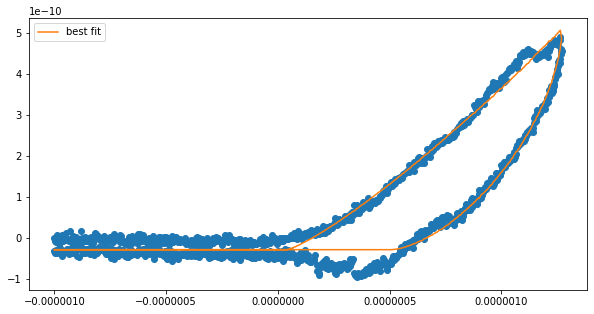

In [506]:
plt.plot(ind_fit[idxDown], force_fit[idxDown], 'o')
# plt.plot(time_fit[idxDown], result.init_fit, '--', label='initial fit')
plt.plot(ind_fit[idxDown], result.best_fit, '-', label='best fit')
plt.legend()
plt.show()